# E-Commerce Shipping Data
## Context
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

## Content
The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

- ID: ID Number of Customers.
- Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
- Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product: Cost of the Product in US Dollars.
- Prior purchases: The Number of Prior Purchase.
- Product importance: The company has categorized the product in the various parameter such as low, medium, high.
- Gender: Male and Female.
- Discount offered: Discount offered on that specific product.
- Weight in gms: It is the weight in grams.
- Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

## Acknowledgements
I would like to specify that I am only making available on Github in Data collected data about product shipment to Kagglers. I made this as my project on Customer Analytics stored in GitHub repository.

## Inspiration
This data of Product Shipment Tracking, answer instantly to your questions:
- What was Customer Rating? And was the product delivered on time?
- Is Customer query is being answered?
- If Product importance is high. having higest rating or being delivered on time?

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.preprocessing import OrdinalEncoder,StandardScaler,PowerTransformer
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier
from xgboost import XGBClassifier

# Import Data

In [90]:
data = pd.read_csv('Train.csv')
df = data.copy()

In [91]:
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [92]:
df.shape

(10999, 12)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [94]:
df.describe()

ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

In [95]:
df.describe(include = 'object')

Warehouse_block Mode_of_Shipment Product_importance Gender
count            10999            10999              10999  10999
unique               5                3                  3      2
top                  F             Ship                low      F
freq              3666             7462               5297   5545

In [96]:
df = df.drop(columns = ['ID'])

# EDA

Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhos

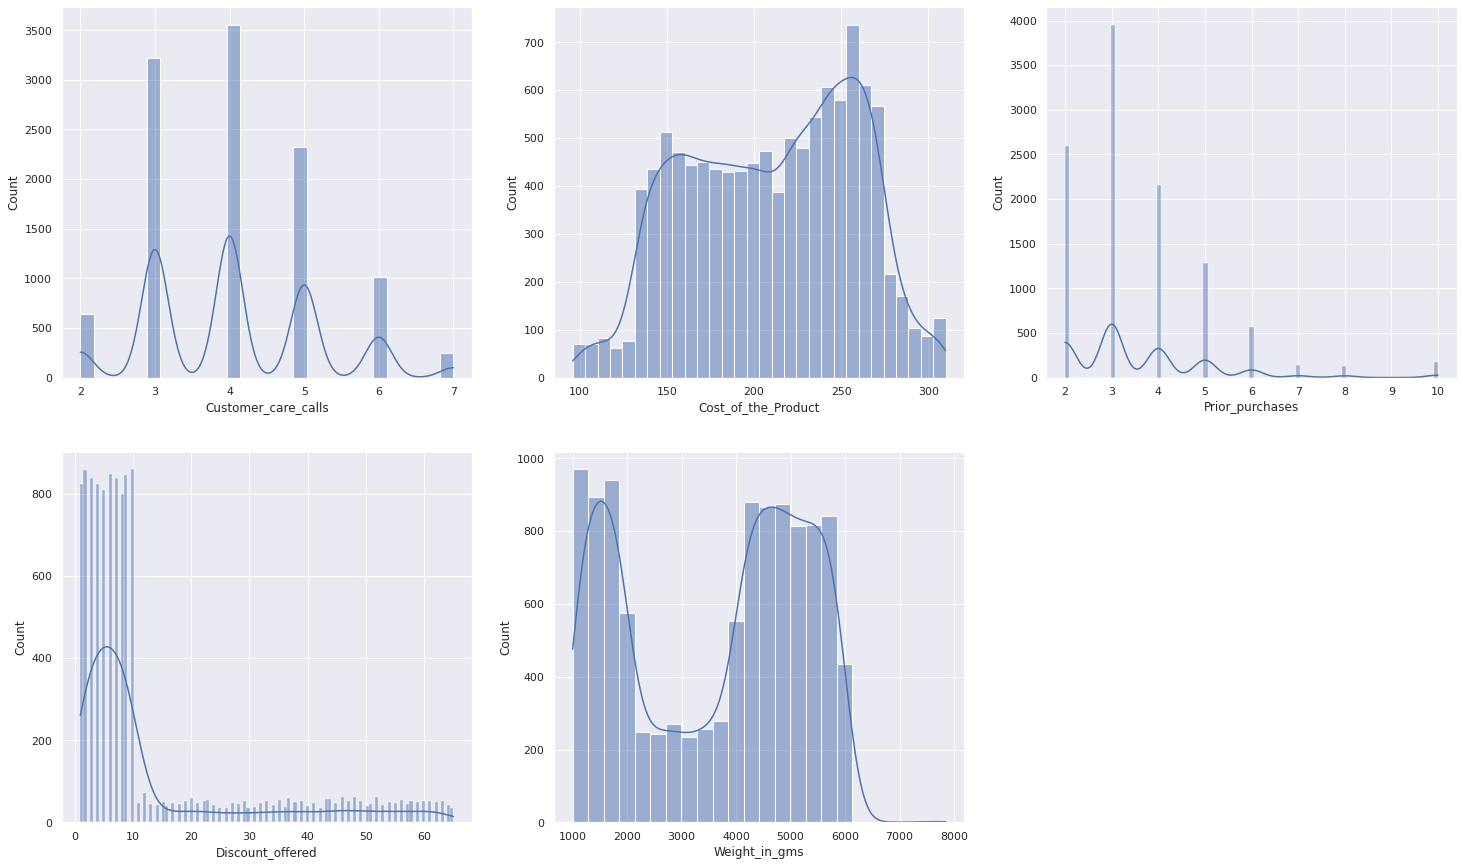

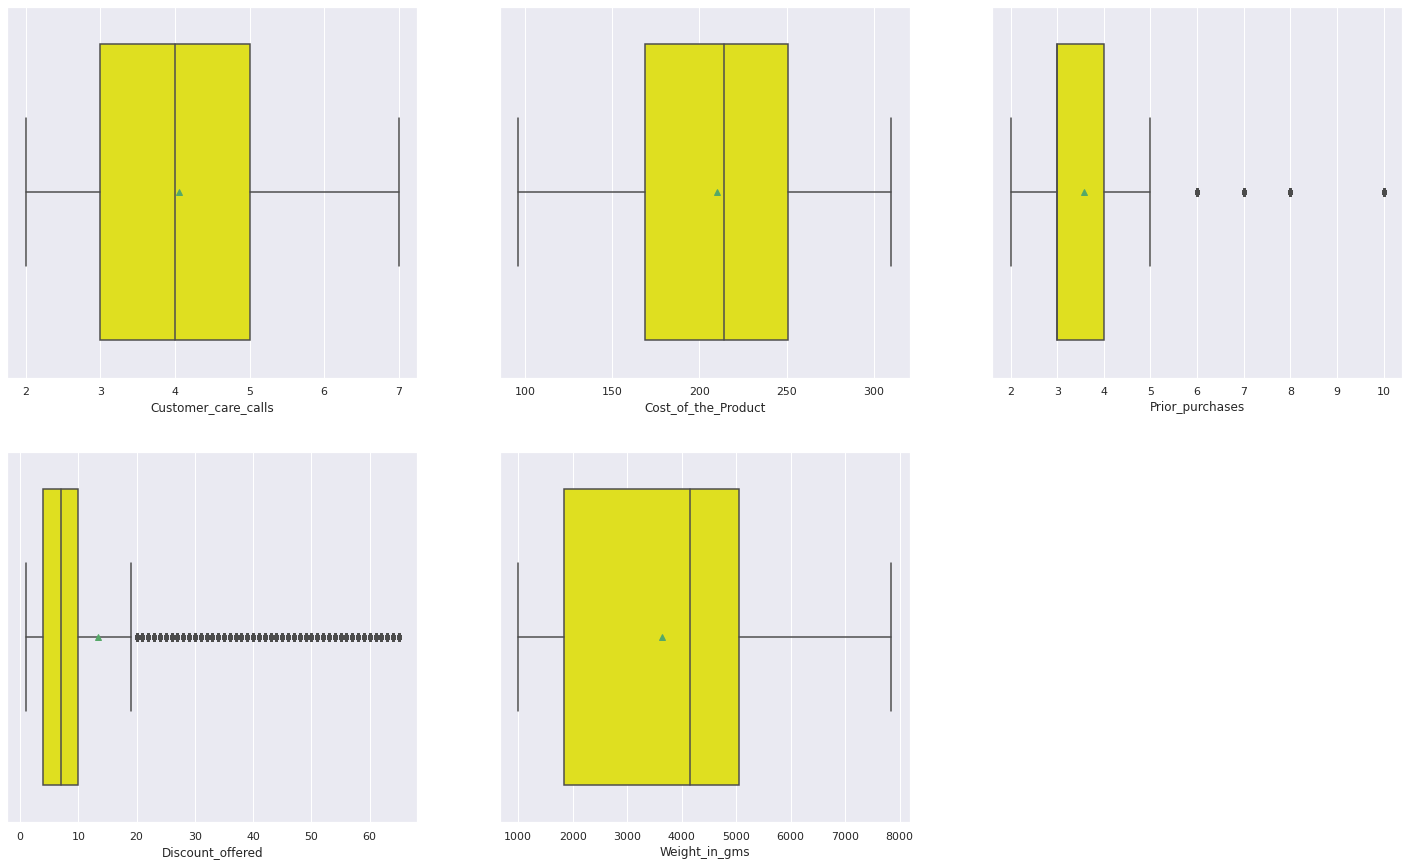

In [97]:
numeric_cols = ['Customer_care_calls','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']
categorical_cols = list(set(df.columns) - set(numeric_cols))

plt.figure(figsize = (25,15))
for i, col in enumerate(numeric_cols):
    plt.subplot(2,3,i + 1)
    sns.histplot(x = col, data = df, kde = True);
    
plt.figure(figsize = (25,15))
for i, col in enumerate(numeric_cols):
    plt.subplot(2,3,i + 1)
    sns.boxplot(x = col, data = df, showmeans = True, color = 'yellow');   

- Most customers make enquiry calls for 3 - 5 times.
- Most customers with prior purchase less than 5 times.
- Discounts offered are mostly smaller than 10%. A lot of outliers on the higher end.
- The weight of products mainly range from 1000 to 6000 grams. Items weigh less than 2000 grams and between 4000-6000 grams take a big proportion.

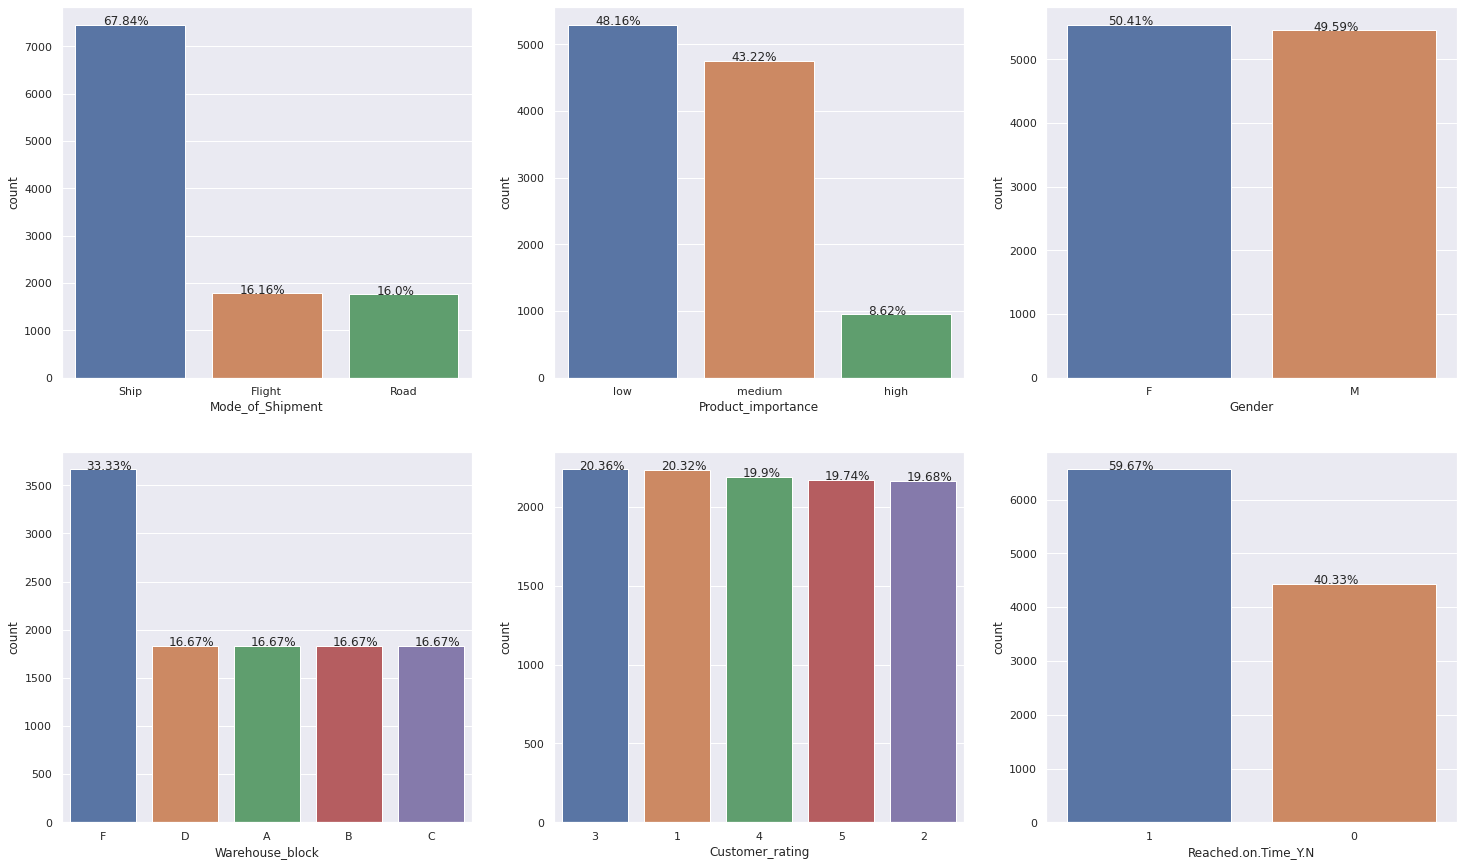

In [98]:
plt.figure(figsize = (25,15))
for i, col in enumerate(categorical_cols):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(x = col, data = df, order = df[col].value_counts().index);
    for p in ax.patches:
        perc = np.round(100 * p.get_height()/df.shape[0],2)
        plt.annotate(str(perc) + '%',(p.get_x() + p.get_width()/2 - 0.2, p.get_y() + p.get_height()));

- More than 30% of products are located at block F. Others are evenly located at the remaining blocks.
- The rating from customers and the distribution of customer's gender are evenly distributed.
- Shipping is the major way this compnay transfers their products.
- About 48% of the products are of low importance. Only 8% are of high importance.
- About 60% of the products fail to reach on time.

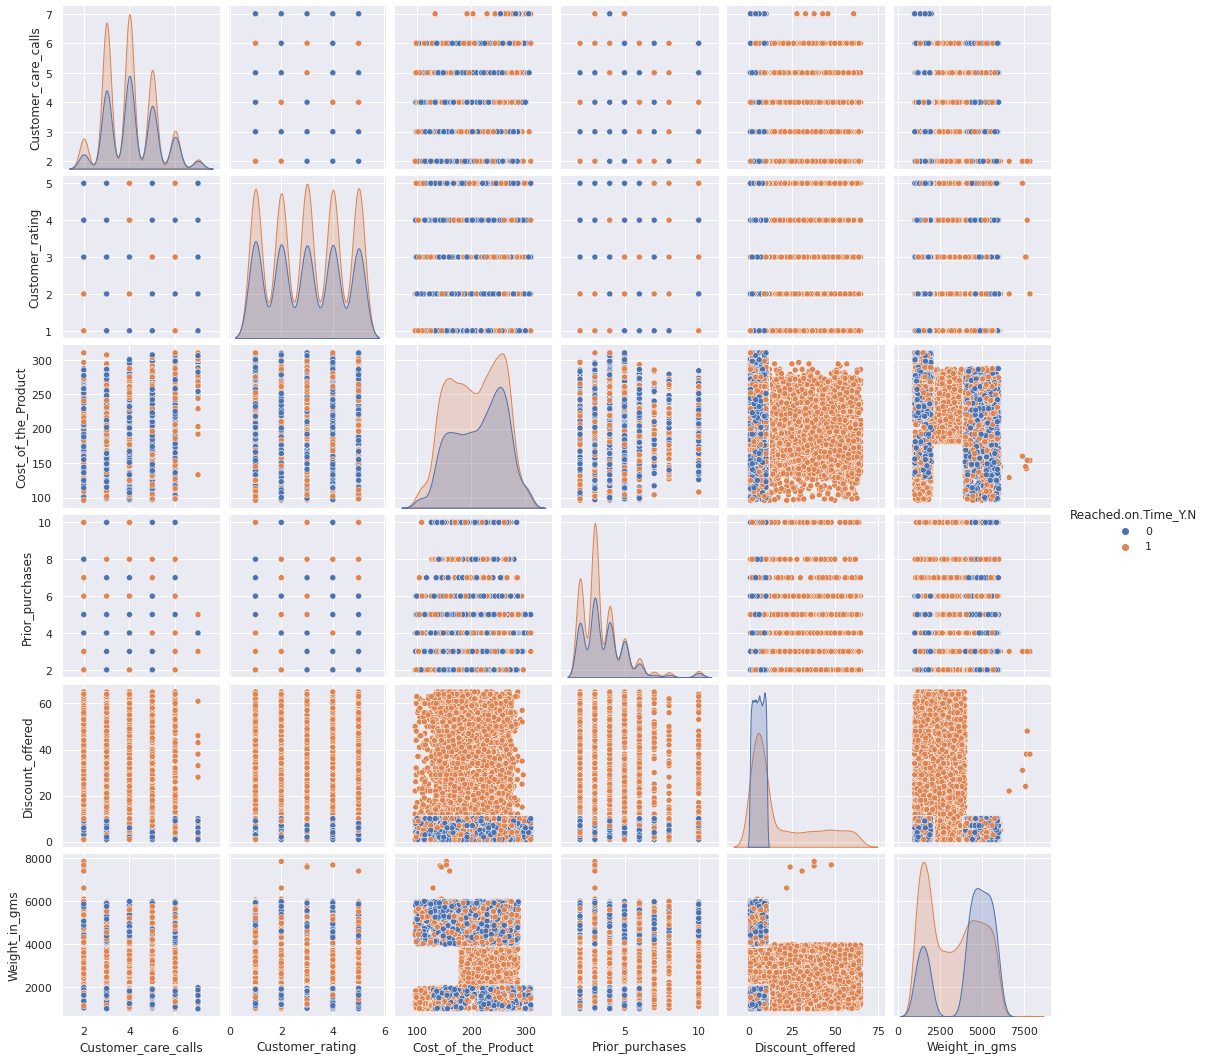

In [99]:
sns.pairplot(df,hue = 'Reached.on.Time_Y.N');

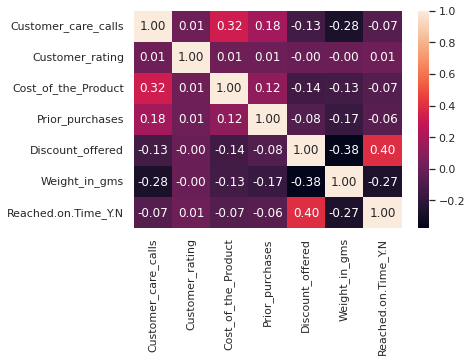

In [100]:
sns.heatmap(data = df.corr(),fmt = '.2f',annot = True);

- `Reached.on.Time_Y.N` and `Discount_offered` are positively correlated. Products offered larger discount are more likely to be delayed.
- `Weight_in_gms` and `Discount_offered` are negatively correlated.

In [101]:
def cat_compare(col):
    pd.crosstab(index = df[col],columns = df['Reached.on.Time_Y.N'], 
            normalize = 'index').plot(kind = 'bar', stacked = True);
    plt.legend(bbox_to_anchor = (1.2, 1.1),loc = 'best');

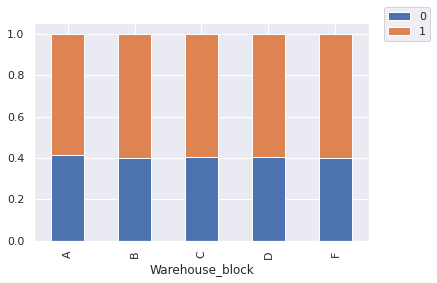

In [102]:
cat_compare('Warehouse_block')

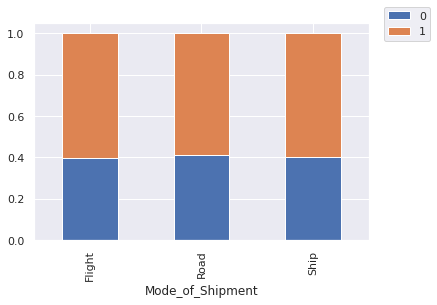

In [103]:
cat_compare('Mode_of_Shipment')

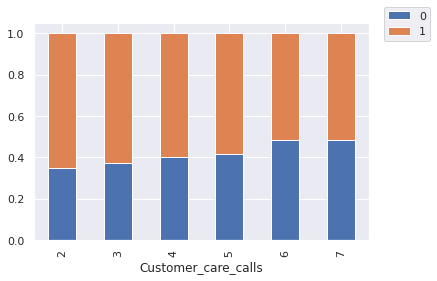

In [104]:
cat_compare('Customer_care_calls')

- Making more calls to enquiry is more likely to achieve timely delivery.

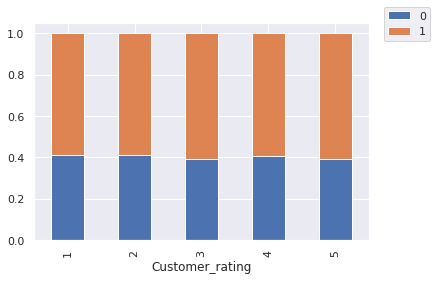

In [105]:
cat_compare('Customer_rating')

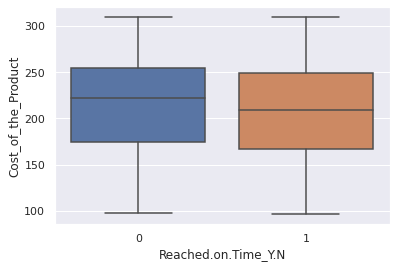

In [106]:
sns.boxplot(x = 'Reached.on.Time_Y.N', y = 'Cost_of_the_Product', data = df);

- Delayed items tend to cost slightly less.

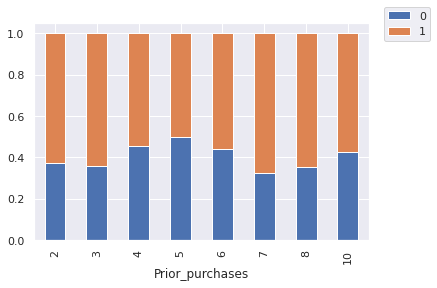

In [107]:
cat_compare('Prior_purchases')

- Customers with prior purchase between 4 - 6 times are less likely to get delayed.

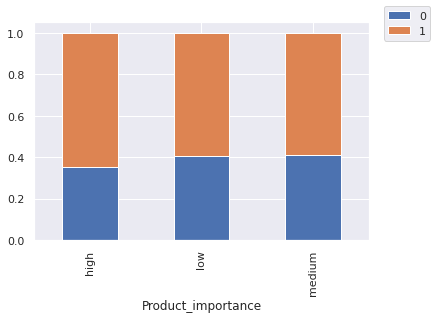

In [108]:
cat_compare('Product_importance')

- Items of high importance are a bit more likely to get delayed.

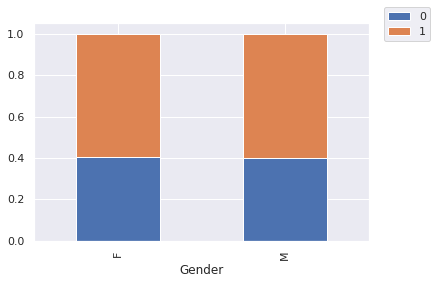

In [109]:
cat_compare('Gender') 

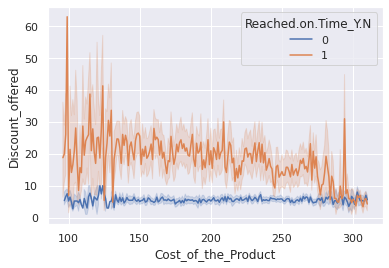

In [110]:
sns.lineplot(x = 'Cost_of_the_Product',y = 'Discount_offered', hue = 'Reached.on.Time_Y.N', data = df);

- Products offered higher discount are more likely to get delayed.

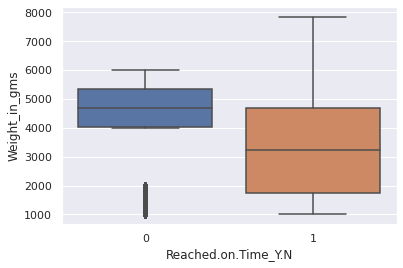

In [111]:
sns.boxplot(x = 'Reached.on.Time_Y.N', y = 'Weight_in_gms', data = df);

- Products getting delayed weigh less.

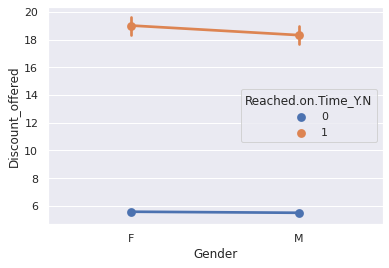

In [112]:
sns.pointplot(x = 'Gender', y = 'Discount_offered', hue = 'Reached.on.Time_Y.N',data = df);

- Female tend to gain higher discount on delayed products.

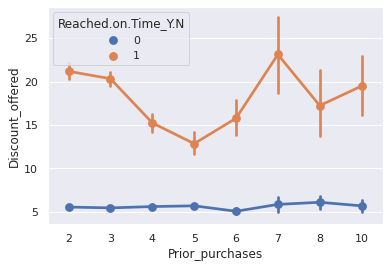

In [113]:
sns.pointplot(x = 'Prior_purchases', y = 'Discount_offered', hue = 'Reached.on.Time_Y.N',data = df);

- For customers who get on-time delivery, their discounts are the lowest. No matter how many prior purchases, their discounts are pretty much the same.
- For customers who are delayed, those purchase for 4 -6 times tend to get lower discounts.

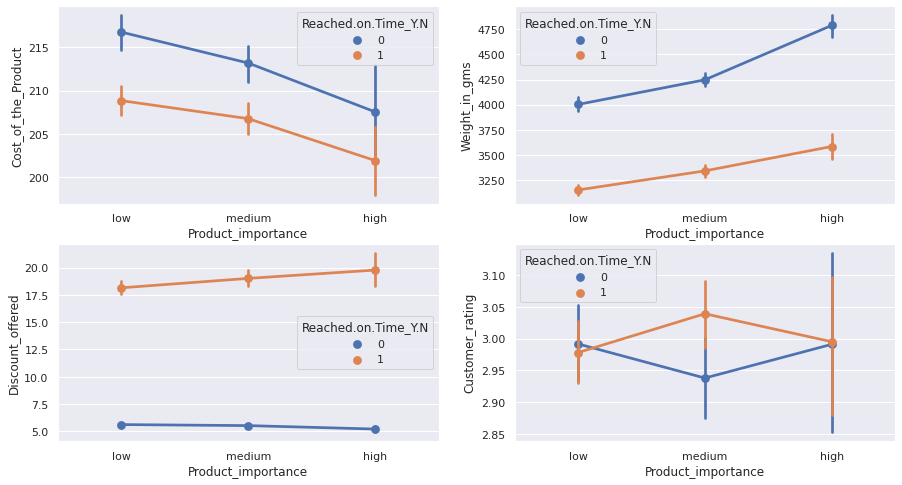

In [114]:
plt.figure(figsize = (15,8))
plt.subplot(221)
sns.pointplot(x = 'Product_importance', y = 'Cost_of_the_Product', hue = 'Reached.on.Time_Y.N',data = df);
plt.subplot(222)
sns.pointplot(x = 'Product_importance', y = 'Weight_in_gms', hue = 'Reached.on.Time_Y.N',data = df);
plt.subplot(223)
sns.pointplot(x = 'Product_importance', y = 'Discount_offered', hue = 'Reached.on.Time_Y.N',data = df);
plt.subplot(224)
sns.pointplot(x = 'Product_importance', y = 'Customer_rating', hue = 'Reached.on.Time_Y.N',data = df);

- Products with higher importance tend to cost less and weight more.
- Delayed products with higher importance are offered higher discounts.
- Product with high or low importance get similar customer rating whether it's timely delivered or not. But delayed product with medium importance would get higher customer rating than non-delayed ones. 

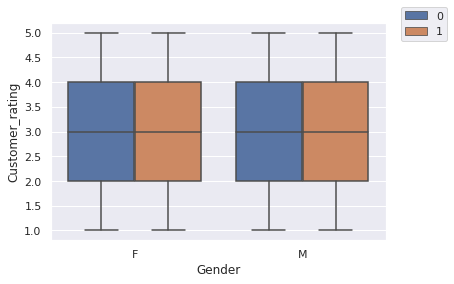

In [115]:
sns.boxplot(x= 'Gender', y = 'Customer_rating', hue = 'Reached.on.Time_Y.N',data = df);
plt.legend(bbox_to_anchor = (1.2, 1.1),loc = 'best');

# Data Preparation

In [116]:
X = df.copy()
y = X.pop('Reached.on.Time_Y.N')

- In the EDA, the relationships between predictors and the target variable are not really linear. Check the mutual information instead:

In [117]:
mi = mutual_info_classif(OrdinalEncoder().fit_transform(X), y, n_neighbors=5, random_state=10)
pd.Series(data = mi, index = X.columns).sort_values(ascending = False)

Discount_offered       0.150671
Weight_in_gms          0.123498
Customer_care_calls    0.005325
Cost_of_the_Product    0.003775
Prior_purchases        0.003746
Product_importance     0.001943
Gender                 0.000910
Customer_rating        0.000227
Warehouse_block        0.000000
Mode_of_Shipment       0.000000
dtype: float64

- Mutual information in predictors are pretty low. The highest one is `Discounts_offered` of 0.15.
- `Warehouse_block` and `Mode_of_Shipment` contain little information, which match the result in EDA.
- Though lots of outliers exist in`Discounts_offered`, they should not be clipped. Because they contain important information to be used for the prediction. 

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,
                                                    stratify = y, random_state = 3)
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)
print(X_train.shape, X_test.shape)

(9349, 15) (1650, 15)


# Model Building

Suppose this is a dataset dynamically updating the target variable based on order status:
- If on-time orders are misclasified as delayed, resources will be wasted on these orders to improve their delivery.
- If delayed orders are misclasified as on-time, customers would be provided with false promises. Once they find their orders actually delayed, they will become unhappy with the service. 
- So the goal is to predict both classes accurately. Use accuracy as metrics.

In [119]:
scorer = "accuracy"
metrics_df = pd.DataFrame(columns = ["Train accuracy", "Test accuracy", "Train recall", 
                                     "Test recall", "Train precision","Test precision"])

In [120]:
def compute_metrics(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    
    m = [accuracy_score(y_train, y1),recall_score(y_train, y1),precision_score(y_train, y1),
         accuracy_score(y_test, y2),recall_score(y_test, y2),precision_score(y_test, y2)]
    metrics_df.loc[model_name, :] = [m[0],m[3],m[1],m[4],m[2],m[5]]
    print("Train accuracy/recall/precision:",m[:3])
    print("Test accuracy/recall/precision:", m[3:])

    return y2

In [121]:
def show_confusion_matrix(y_true, y_pred, labels = ["On Time", "Delay"]):
    cm = confusion_matrix(y_true, y_pred)
    flatten = cm.reshape(-1)
    annot = np.array(["{0}\n{1:.2f}%".format(c, 100*n) 
             for c,n in zip(flatten, flatten / np.sum(cm))]).reshape(2,-1)
    sns.heatmap(pd.DataFrame(cm, index = labels, columns = labels), fmt = 's',annot = annot)
    plt.xlabel("Prediction")
    plt.ylabel("Ground Truth")

## Ensemble
### Cross Validation

rf : 0.6527966855792369
adb : 0.6744030809463724
gb : 0.6795372858029831


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


xgb : 0.6564331636638312


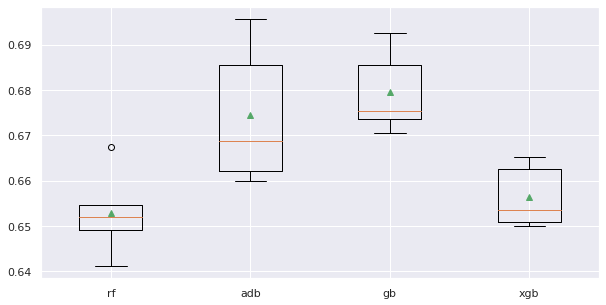

In [122]:
models = [
    ("rf", RandomForestClassifier(n_jobs = -1, random_state = 2)),
    ("adb", AdaBoostClassifier(random_state = 2)),    
    ("gb", GradientBoostingClassifier(random_state = 2)),
    ("xgb", XGBClassifier(objective='binary:logistic', booster = 'gbtree',verbosity = 0,
                          tree_method='gpu_hist',use_label_encoder=False, n_jobs = -1, random_state = 2)),
]

cv_score = []
for name, model in models:
    score = cross_val_score(model, X_train, y_train, scoring=scorer, cv=5, n_jobs=-1)
    cv_score.append(score)
    print(name, ":", score.mean())

plt.figure(figsize = (10,5));   
plt.boxplot(x = cv_score,showmeans = True, labels = [name for name, _ in models]);   

In [123]:
for name, model in models:
    print(name, ":")
    compute_metrics(model, name, X_train, y_train, X_test, y_test)
    print()

rf :
Train accuracy/recall/precision: [1.0, 1.0, 1.0]
Test accuracy/recall/precision: [0.666060606060606, 0.6416243654822334, 0.7614457831325301]

adb :
Train accuracy/recall/precision: [0.6816771847256391, 0.6193976335604159, 0.8019962859795728]
Test accuracy/recall/precision: [0.6745454545454546, 0.6131979695431472, 0.7947368421052632]

gb :
Train accuracy/recall/precision: [0.718793453845331, 0.5665112943707422, 0.9374072975378226]
Test accuracy/recall/precision: [0.6727272727272727, 0.5248730964467005, 0.8777589134125636]

xgb :
Train accuracy/recall/precision: [0.8999893036688416, 0.8775546790964504, 0.9510394404507481]
Test accuracy/recall/precision: [0.64, 0.6456852791878173, 0.7219069239500567]



- All four models achieve similar accuracy. XGBoost and random forest are overfitting.

### AdaBoost Tuning

In [124]:
clf = AdaBoostClassifier(random_state = 2)
param = {
    "base_estimator":[
        DecisionTreeClassifier(max_depth = 3, random_state = 1),
        DecisionTreeClassifier(max_depth = 4, random_state = 1),
        DecisionTreeClassifier(max_depth = 5, random_state = 1),
        DecisionTreeClassifier(max_depth = 7, random_state = 1),
    ],
    "n_estimators":np.arange(50,301,50),
    "learning_rate":np.arange(0.1,1,0.1),
}
clf = RandomizedSearchCV(clf, param_distributions = param,n_iter=40, 
                         scoring=scorer, n_jobs=-1, cv=5, random_state=8).fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.6863831783990408
{'n_estimators': 50, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}


In [125]:
adb_tuned = clf.best_estimator_
y_pred = compute_metrics(adb_tuned, "adb_tuned", X_train, y_train, X_test, y_test)

Train accuracy/recall/precision: [0.7092737191143438, 0.5414126927214056, 0.949685534591195]
Test accuracy/recall/precision: [0.6727272727272727, 0.5025380710659898, 0.908256880733945]


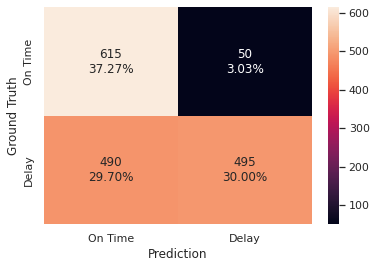

In [126]:
show_confusion_matrix(y_test, y_pred)

In [127]:
pd.DataFrame(data = {"feature importances": adb_tuned.feature_importances_},
             index = X_train.columns).sort_values(by = "feature importances", ascending = False).T

Weight_in_gms  Cost_of_the_Product  Discount_offered  \
feature importances       0.470287              0.20148           0.08889   

                     Customer_care_calls  Prior_purchases  Customer_rating  \
feature importances             0.084854         0.071462         0.031472   

                     Product_importance_low  Product_importance_medium  \
feature importances                 0.02292                   0.014159   

                     Warehouse_block_B  Warehouse_block_F  Gender_M  \
feature importances           0.008035           0.003749  0.002693   

                     Warehouse_block_C  Warehouse_block_D  \
feature importances                0.0                0.0   

                     Mode_of_Shipment_Road  Mode_of_Shipment_Ship  
feature importances                    0.0                    0.0

### GradientBoost Tuning

In [128]:
clf = GradientBoostingClassifier(random_state = 2)
param = {
    "n_estimators":np.arange(100,301,50),
    "max_depth":np.arange(3,9),
    "max_features":["sqrt", None, "log2"]+ list(np.arange(0.1,1,0.1)),
    "subsample":np.arange(0.1,1,0.1),
}
clf = RandomizedSearchCV(clf, param_distributions = param,n_iter=40, 
                         scoring=scorer, n_jobs=-1, cv=5, random_state=8).fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.6727988600956214
{'subsample': 0.7000000000000001, 'n_estimators': 100, 'max_features': 0.30000000000000004, 'max_depth': 5}


In [129]:
gb_tuned = clf.best_estimator_
y_pred = compute_metrics(gb_tuned, "gb_tuned", X_train, y_train, X_test, y_test)

Train accuracy/recall/precision: [0.7783720183976895, 0.6891358910003585, 0.9191774270683883]
Test accuracy/recall/precision: [0.6612121212121213, 0.5746192893401015, 0.8016997167138811]


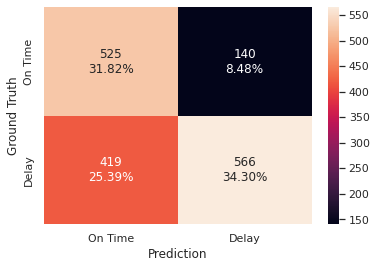

In [130]:
show_confusion_matrix(y_test, y_pred)

In [131]:
pd.DataFrame(data = {"feature importances": gb_tuned.feature_importances_},
             index = X_train.columns).sort_values(by = "feature importances", ascending = False).T

Weight_in_gms  Discount_offered  Cost_of_the_Product  \
feature importances       0.375419          0.319751             0.114471   

                     Prior_purchases  Customer_care_calls  Customer_rating  \
feature importances         0.064032              0.04284         0.023043   

                     Product_importance_low  Gender_M  Warehouse_block_F  \
feature importances                0.007866  0.007639           0.007348   

                     Warehouse_block_C  Product_importance_medium  \
feature importances           0.007222                   0.006682   

                     Warehouse_block_D  Mode_of_Shipment_Road  \
feature importances            0.00641                0.00608   

                     Mode_of_Shipment_Ship  Warehouse_block_B  
feature importances               0.005868           0.005329

### Random Forest Tuning

In [132]:
clf = RandomForestClassifier(n_jobs = -1, random_state = 2)
param = {
    "n_estimators":np.arange(100,301,50),
    "max_depth":np.arange(3,9),
    "max_features":["sqrt", None, "log2"]+ list(np.arange(0.1,1,0.1)),
    "max_samples":[None]+ list(np.arange(0.1,1,0.1)),
}
clf = RandomizedSearchCV(clf, param_distributions = param,n_iter=40, 
                         scoring=scorer, n_jobs=-1, cv=5, random_state=8).fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.6857407232555944
{'n_estimators': 150, 'max_samples': 0.9, 'max_features': 0.7000000000000001, 'max_depth': 5}


In [133]:
rf_tuned = clf.best_estimator_
y_pred = compute_metrics(rf_tuned, "rf_tuned", X_train, y_train, X_test, y_test)

Train accuracy/recall/precision: [0.6932292223767248, 0.5120114736464683, 0.9513657561625583]
Test accuracy/recall/precision: [0.6787878787878788, 0.4964467005076142, 0.9349904397705545]


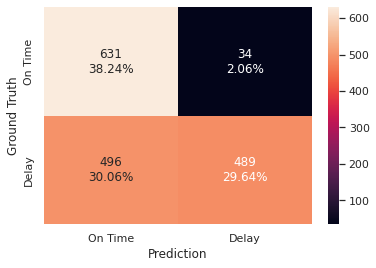

In [134]:
show_confusion_matrix(y_test, y_pred)

In [135]:
pd.DataFrame(data = {"feature importances": rf_tuned.feature_importances_},
             index = X_train.columns).sort_values(by = "feature importances", ascending = False).T

Discount_offered  Weight_in_gms  Prior_purchases  \
feature importances           0.62664       0.270177         0.052673   

                     Cost_of_the_Product  Customer_care_calls  \
feature importances             0.035741             0.006462   

                     Customer_rating  Product_importance_medium  \
feature importances         0.002785                   0.000864   

                     Product_importance_low  Warehouse_block_D  \
feature importances                0.000748           0.000743   

                     Warehouse_block_F  Warehouse_block_B  Gender_M  \
feature importances           0.000688           0.000612  0.000521   

                     Warehouse_block_C  Mode_of_Shipment_Road  \
feature importances           0.000514               0.000478   

                     Mode_of_Shipment_Ship  
feature importances               0.000354

### XGB Tunig

In [136]:
clf = XGBClassifier(objective='binary:logistic', booster = 'gbtree',verbosity = 0,
                    tree_method='gpu_hist',n_jobs = -1,use_label_encoder=False, random_state = 2)
param = {
    "gamma":np.arange(0.2,1,0.1),
    "max_depth":np.arange(3,9),
    "learning_rate":np.arange(0.1,1,0.1),
    "subsample":np.arange(0.1,1,0.1),
    "colsample_bytree":np.arange(0.1,1,0.1),
    "colsample_bylevel":np.arange(0.1,1,0.1),
}
clf = RandomizedSearchCV(clf, param_distributions = param,n_iter=40, verbose=0,
                         scoring=scorer, n_jobs=-1, cv=5, random_state=8).fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.6714090580052245
{'subsample': 0.8, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.8000000000000003, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7000000000000001}


In [137]:
xgb_tuned = clf.best_estimator_
y_pred = compute_metrics(xgb_tuned, "xgb_tuned", X_train, y_train, X_test, y_test)

Train accuracy/recall/precision: [0.7598673654936356, 0.6509501613481534, 0.9241537286841436]
Test accuracy/recall/precision: [0.6709090909090909, 0.566497461928934, 0.827893175074184]


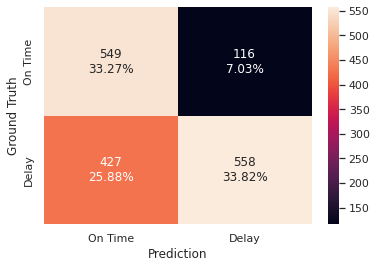

In [138]:
show_confusion_matrix(y_test, y_pred)

In [139]:
pd.DataFrame(data = {"feature importances": xgb_tuned.feature_importances_},
             index = X_train.columns).sort_values(by = "feature importances", ascending = False).T

Discount_offered  Weight_in_gms  Prior_purchases  \
feature importances          0.402332       0.172619         0.089085   

                     Cost_of_the_Product  Customer_care_calls  \
feature importances             0.049147             0.045352   

                     Warehouse_block_F  Product_importance_low  \
feature importances           0.027982                0.025543   

                     Product_importance_medium  Warehouse_block_D  \
feature importances                   0.024554           0.024331   

                     Mode_of_Shipment_Ship  Gender_M  Customer_rating  \
feature importances                0.02432   0.02344         0.023411   

                     Mode_of_Shipment_Road  Warehouse_block_C  \
feature importances               0.023225           0.022698   

                     Warehouse_block_B  
feature importances           0.021962

### Stacking

In [140]:
estimators = [
    ("rf_tuned", rf_tuned),
    ("xgb_tuned", xgb_tuned),
    ("gb_tuned", gb_tuned),
    ("adb_tuned", adb_tuned)
]
stack = StackingClassifier(estimators = estimators, final_estimator = rf_tuned, cv=3, n_jobs=-1, passthrough=True)
y_pred = compute_metrics(stack, "stacking", X_train, y_train, X_test, y_test)

Train accuracy/recall/precision: [0.6907690662102899, 0.4962352097525995, 0.9715689715689716]
Test accuracy/recall/precision: [0.6775757575757576, 0.4761421319796954, 0.9670103092783505]


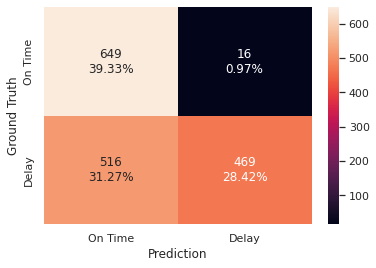

In [141]:
show_confusion_matrix(y_test, y_pred)

## Neural Network

In [142]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy

# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# tf.debugging.set_log_device_placement(True)

In [143]:
column_transformer = make_column_transformer(
    (StandardScaler(),["Customer_care_calls","Customer_rating","Cost_of_the_Product",
                      "Prior_purchases","Discount_offered","Weight_in_gms"]),
    remainder='passthrough', n_jobs=-1)

In [144]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = True, random_state = 7, stratify = y_train)
X1_train = column_transformer.fit_transform(X1_train)
X1_val = column_transformer.transform(X1_val)
X1_test = column_transformer.transform(X_test)

In [145]:
def nn_1():
    model = Sequential([
        Dense(units = 20, input_shape = (X1_train.shape[1],), 
              activation = "relu",kernel_initializer='he_uniform'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(units = 20, activation = "relu",kernel_initializer='he_uniform'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(units = 10, activation = "relu",kernel_initializer='he_uniform'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(units = 1, activation = "sigmoid",kernel_initializer='glorot_uniform')
        ]        
    )
    loss = BinaryCrossentropy(from_logits=False, label_smoothing=0.1)
    model.compile(optimizer='adam', loss=loss, metrics="binary_accuracy")
    return model

In [146]:
m1 = nn_1()
m1.summary()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:

In [147]:
es = EarlyStopping(monitor='val_loss', mode='auto',patience=7, verbose=0, restore_best_weights=True)
history = m1.fit(x=X1_train, y=y1_train, batch_size=64, epochs=100, verbose=1,
    callbacks=[es], validation_data = (X1_val, y1_val))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapData

2022-01-23 02:24:00.856850: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:00.857388: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:00.857727: I tensorflow/core/common_runtime/placer.cc:114] RandomShuffle: (RandomShuffle): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:00.858003: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:00.858248: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:00.858508: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:00.858830: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:C

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerCon

2022-01-23 02:24:01.735099: I tensorflow/core/common_runtime/placer.cc:114] iterator: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:01.735151: I tensorflow/core/common_runtime/placer.cc:114] iterator_1: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:01.735165: I tensorflow/core/common_runtime/placer.cc:114] sequential_3_dense_12_matmul_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2022-01-23 02:24:01.735183: I tensorflow/core/common_runtime/placer.cc:114] sequential_3_dense_12_biasadd_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2022-01-23 02:24:01.735195: I tensorflow/core/common_runtime/placer.cc:114] sequential_3_batch_normalization_9_assignmovingavg_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2022-01-23 02:24:01.735207: I tensorflow/core/common_runtime/placer.cc:114] sequential_3_batch_normalization_9_assignmovingavg_1_readvariableop_reso

  1/117 [..............................] - ETA: 2:07 - loss: 0.8910 - binary_accuracy: 0.5312Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.9828 - binary_accuracy: 0.5417  Execut

2022-01-23 02:24:03.005443: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:03.006769: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:03.007262: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:03.007489: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:03.007782: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:03.008118: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:03.008346: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

iterator: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
iterator_1: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
sequential_3_dense_12_matmul_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
sequential_3_dense_12_biasadd_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
sequential_3_batch_normalization_9_batchnorm_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
sequential_3_batch_normalization_9_batchnorm_mul_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
sequential_3_batch_normalization_9_batchnorm_readvariableop_1_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
sequential_3_batch_normalization_9_batchnorm_readvariableop_2_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
sequential_3_dense_13_matmul_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
sequential_3_dense_13_biasadd_readvariableop_resou

2022-01-23 02:24:03.312068: I tensorflow/core/common_runtime/placer.cc:114] iterator: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:03.312116: I tensorflow/core/common_runtime/placer.cc:114] iterator_1: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:03.312130: I tensorflow/core/common_runtime/placer.cc:114] sequential_3_dense_12_matmul_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2022-01-23 02:24:03.312150: I tensorflow/core/common_runtime/placer.cc:114] sequential_3_dense_12_biasadd_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2022-01-23 02:24:03.312163: I tensorflow/core/common_runtime/placer.cc:114] sequential_3_batch_normalization_9_batchnorm_readvariableop_resource: (_Arg): /job:localhost/replica:0/task:0/device:GPU:0
2022-01-23 02:24:03.312175: I tensorflow/core/common_runtime/placer.cc:114] sequential_3_batch_normalization_9_batchnorm_mul_readvariableop_resource: (_Ar

Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:04.585114: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:04.585318: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:04.585350: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:04.585397: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:04.585419: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:04.585435: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:04.585450: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/117 [=>............................] - ETA: 0s - loss: 0.6501 - binary_accuracy: 0.6328Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:05.463034: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:05.463090: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:05.463106: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:05.463117: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:05.463131: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:05.463145: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:05.463158: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in de

2022-01-23 02:24:06.377216: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:06.377807: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:06.378038: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:06.378274: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:06.378379: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:06.378416: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:06.379034: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.6529 - binary_accuracy: 0.5868Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:07.250603: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:07.250681: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:07.250703: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:07.250717: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:07.250733: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:07.251410: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:07.251759: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in de

2022-01-23 02:24:08.166050: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:08.166744: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:08.166996: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:08.167222: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:08.167520: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:08.167753: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:08.168035: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loc

2022-01-23 02:24:09.121121: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:09.121192: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:09.121212: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:09.121225: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:09.121252: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:09.121271: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:09.121285: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.6091 - binary_accuracy: 0.6406Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:10.027776: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:10.027856: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:10.027878: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:10.027892: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:10.027911: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:10.028355: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:10.028400: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.6011 - binary_accuracy: 0.6476Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:10.899407: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:10.899461: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:10.899476: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:10.899488: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:10.899500: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:10.899514: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:10.899527: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.6184 - binary_accuracy: 0.6042Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:11.776727: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:11.776777: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:11.776792: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:11.776804: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:11.776817: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:11.776830: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:11.776844: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/117 [>.............................] - ETA: 1s - loss: 0.6004 - binary_accuracy: 0.6339Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:12.665470: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:12.665539: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:12.665574: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:12.665588: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:12.665603: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:12.666234: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:12.666728: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /jo

2022-01-23 02:24:13.692423: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:13.692479: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:13.692499: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:13.692513: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:13.692528: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:13.692542: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:13.692571: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loc

2022-01-23 02:24:14.764525: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:14.764597: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:14.764615: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:14.764627: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:14.764640: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:14.764654: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:14.764671: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in de

2022-01-23 02:24:15.700689: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:15.701133: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:15.701377: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:15.701613: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:15.701843: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:15.702058: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:15.702292: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.6019 - binary_accuracy: 0.6528Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:16.590710: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:16.590776: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:16.590795: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:16.590807: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:16.590832: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:16.591269: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:16.591345: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5991 - binary_accuracy: 0.6441Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:17.475061: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:17.475114: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:17.475129: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:17.475141: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:17.475154: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:17.475167: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:17.475181: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5948 - binary_accuracy: 0.6319Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:18.346129: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:18.346849: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:18.347209: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:18.347542: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:18.347862: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:18.348216: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:18.348251: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in 

2022-01-23 02:24:19.284249: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:19.284305: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:19.284344: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:19.284358: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:19.284372: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:19.284387: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:19.284402: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/117 [=>............................] - ETA: 1s - loss: 0.5918 - binary_accuracy: 0.6309Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:20.193710: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:20.193777: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:20.193797: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:20.193811: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:20.193836: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:20.193855: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:20.194069: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableO

2022-01-23 02:24:21.124666: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:21.125119: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:21.125390: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:21.125621: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:21.125848: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:21.126111: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:21.126317: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5883 - binary_accuracy: 0.6458Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:21.996380: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:21.996433: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:21.996449: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:21.996460: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:21.996473: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:21.996486: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:21.996517: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 22/100
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/117 [..............................] - ETA: 0s - loss: 0.5982 - binary_accuracy: 0.5781Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU

2022-01-23 02:24:22.922160: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:22.922254: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:22.922274: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:22.922288: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:22.922302: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:22.922322: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:22.922337: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 23/100
Executi

2022-01-23 02:24:23.850426: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:23.850478: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:23.850493: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:23.850505: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:23.850518: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:23.850531: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:23.850557: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5988 - binary_accuracy: 0.6163Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:24.847682: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:24.847901: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:24.848078: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:24.848232: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:24.848373: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:24.848485: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:24.848606: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

  1/117 [..............................] - ETA: 0s - loss: 0.5423 - binary_accuracy: 0.7500Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5776 - binary_accuracy: 0.6771Executing 

2022-01-23 02:24:25.854019: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:25.854074: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:25.854090: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:25.854101: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:25.854114: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:25.854127: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:25.854140: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /jo

2022-01-23 02:24:26.785997: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:26.786053: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:26.786069: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:26.786081: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:26.786094: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:26.786107: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:26.786120: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /jo

2022-01-23 02:24:27.719514: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:27.719582: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:27.719600: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:27.719613: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:27.719626: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:27.719641: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:27.720073: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5930 - binary_accuracy: 0.6510Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:28.607454: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:28.607522: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:28.607555: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:28.607569: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:28.607584: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:28.607605: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:28.607938: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5808 - binary_accuracy: 0.6580Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:29.520414: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:29.520474: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:29.520494: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:29.520509: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:29.520525: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:29.520542: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:29.520571: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/117 [=>............................] - ETA: 0s - loss: 0.6023 - binary_accuracy: 0.6191Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:30.441313: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:30.441381: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:30.441400: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:30.441413: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:30.441428: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:30.441446: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:30.441463: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loc

2022-01-23 02:24:31.373227: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:31.374123: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:31.374364: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:31.374587: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:31.374764: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:31.374983: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:31.375199: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableO

2022-01-23 02:24:32.310048: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:32.310123: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:32.310145: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:32.310160: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:32.310177: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:32.310198: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:32.310215: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5730 - binary_accuracy: 0.6649Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:33.215424: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:33.216016: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:33.216386: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:33.216712: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:33.217058: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:33.217438: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:33.217756: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/117 [=>............................] - ETA: 0s - loss: 0.5768 - binary_accuracy: 0.6484Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:34.099143: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:34.099201: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:34.099217: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:34.099228: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:34.099242: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:34.099256: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:34.099270: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/117 [=>............................] - ETA: 0s - loss: 0.5773 - binary_accuracy: 0.6687Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:35.004734: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:35.005112: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:35.005383: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:35.005613: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:35.005867: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:35.006074: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:35.006310: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5793 - binary_accuracy: 0.6424Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:36.610785: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:36.610840: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:36.610858: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:36.610873: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:36.610889: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:36.610906: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:36.610922: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loc

2022-01-23 02:24:37.640597: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:37.640666: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:37.640685: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:37.640697: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:37.640713: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:37.641086: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:37.641133: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5850 - binary_accuracy: 0.6458Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:38.511410: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:38.511477: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:38.511497: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:38.511510: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:38.511525: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:38.511955: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:38.512143: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst 

2022-01-23 02:24:39.452457: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:39.453024: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:39.453278: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:39.453525: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:39.453766: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:39.454032: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:39.454264: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /j

2022-01-23 02:24:40.403439: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:40.403508: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:40.403527: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:40.403541: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:40.403569: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:40.404181: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:40.404594: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5606 - binary_accuracy: 0.6944Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:41.273025: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:41.273633: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:41.273952: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:41.274267: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:41.274601: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:41.274930: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:41.275224: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/117 [=>............................] - ETA: 0s - loss: 0.5799 - binary_accuracy: 0.6738Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:42.179535: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:42.179616: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:42.179635: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:42.179648: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:42.179663: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:42.179692: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:42.179706: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/117 [===>..........................] - ETA: 0s - loss: 0.5815 - binary_accuracy: 0.6502Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:43.037868: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:43.038273: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:43.038312: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:43.038340: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:43.038370: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:43.038398: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:43.038415: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/117 [=>............................] - ETA: 0s - loss: 0.5763 - binary_accuracy: 0.6582Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:43.916759: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:43.916816: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:43.916833: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:43.916845: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:43.916859: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:43.916873: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:43.916887: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/117 [=>............................] - ETA: 0s - loss: 0.5774 - binary_accuracy: 0.6543Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:44.809772: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:44.809985: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:44.810067: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:44.810280: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:44.810393: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:44.810459: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:44.810478: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/117 [===>..........................] - ETA: 0s - loss: 0.5921 - binary_accuracy: 0.6484Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:45.655199: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:45.655251: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:45.655272: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:45.655286: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:45.655300: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:45.655315: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:45.655329: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:

2022-01-23 02:24:46.692430: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:46.692606: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:46.692921: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:46.692951: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:46.692971: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:46.692994: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:46.693342: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /j

2022-01-23 02:24:47.729371: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:47.729439: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:47.729458: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:47.729472: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:47.729487: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:47.729501: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:47.729515: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableO

2022-01-23 02:24:48.700159: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:48.700228: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:48.700248: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:48.700261: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:48.700276: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:48.700295: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:48.700311: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in 

2022-01-23 02:24:49.639100: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:49.639320: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:49.639351: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:49.639396: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:49.639424: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:49.639439: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:49.639462: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5832 - binary_accuracy: 0.6233Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 16/117 [===>..........................] - ETA: 0s - loss: 0.5851 - binary_accuracy: 0.6240Executing 

2022-01-23 02:24:50.511810: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:50.511883: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:50.511903: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:50.511916: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:50.512206: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:50.512265: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:50.512284: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5882 - binary_accuracy: 0.6337Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:51.404631: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:51.404700: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:51.404721: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:51.404735: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:51.404749: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:51.405380: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:51.405413: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/117 [=>............................] - ETA: 0s - loss: 0.5805 - binary_accuracy: 0.6703Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:52.285980: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:52.286441: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:52.286734: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:52.286999: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:52.287283: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:52.287572: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:52.287829: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/117 [===>..........................] - ETA: 0s - loss: 0.5789 - binary_accuracy: 0.6736Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:53.129761: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:53.130408: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:53.130773: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:53.131083: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:53.131411: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:53.131750: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:53.132099: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/117 [=>............................] - ETA: 0s - loss: 0.5810 - binary_accuracy: 0.6891Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:54.013238: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:54.013308: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:54.013347: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:54.013362: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:54.013380: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:54.013397: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:54.013411: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 56/100
Executi

2022-01-23 02:24:54.945578: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:54.945997: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:54.946201: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:54.946434: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:54.946669: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:54.946900: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:54.947130: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 57/100
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/117 [..............................] - ETA: 0s - loss: 0.6518 

2022-01-23 02:24:55.867078: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:55.867689: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:55.867954: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:55.868149: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:55.868206: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:55.868380: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:55.868431: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in 

2022-01-23 02:24:56.795909: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:56.795977: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:56.795994: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:56.796006: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:56.796020: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:56.796035: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:56.796050: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/117 [=>............................] - ETA: 0s - loss: 0.5670 - binary_accuracy: 0.6758Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:57.813522: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:57.813593: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:57.813612: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:57.813625: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:57.813639: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:57.813654: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:57.813673: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 60/100
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/117 [..............................] - ETA: 0s - loss: 0.5896 - binary_accuracy: 0.5938Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU

2022-01-23 02:24:58.779534: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:58.779622: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:58.779643: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:58.779657: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:58.779672: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:58.779693: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:58.780196: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/117 [===>..........................] - ETA: 0s - loss: 0.5671 - binary_accuracy: 0.6910Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:24:59.675860: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:59.675907: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:59.675922: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:59.675934: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:59.675947: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:59.675961: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:24:59.675974: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:

2022-01-23 02:25:00.625797: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:00.626053: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:00.626133: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:00.626153: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:00.626168: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:00.626183: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:00.626196: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5608 - binary_accuracy: 0.6701Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:01.512274: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:01.512353: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:01.512377: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:01.512392: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:01.513112: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:01.513493: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:01.513536: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5740 - binary_accuracy: 0.6493Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:02.390048: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:02.390651: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:02.391008: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:02.391345: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:02.391668: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:02.391985: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:02.392016: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5857 - binary_accuracy: 0.6545Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:03.274016: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:03.274088: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:03.274109: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:03.274123: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:03.274138: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:03.274761: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:03.275286: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/117 [=>............................] - ETA: 0s - loss: 0.5717 - binary_accuracy: 0.6641Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:04.175043: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:04.175715: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:04.176101: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:04.176425: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:04.176768: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:04.176801: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:04.176852: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device 

2022-01-23 02:25:05.099916: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:05.100346: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:05.100590: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:05.100791: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:05.101009: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:05.101269: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:05.101465: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  8/117 [=>............................] - ETA: 0s - loss: 0.5746 - binary_accuracy: 0.6426Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:06.001640: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:06.001704: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:06.001723: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:06.001736: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:06.001751: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:06.001770: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:06.001785: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 19/117 [===>..........................] - ETA: 0s - loss: 0.5948 - binary_accuracy: 0.6373Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:06.827920: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:06.828451: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:06.828724: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:06.828929: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:06.828962: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:06.828989: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:06.829460: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  6/117 [>.............................] - ETA: 1s - loss: 0.5719 - binary_accuracy: 0.6719Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:07.730108: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:07.730164: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:07.730179: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:07.730190: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:07.730203: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:07.730216: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:07.730230: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 19/117 [===>..........................] - ETA: 0s - loss: 0.5706 - binary_accuracy: 0.6760Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:08.666011: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:08.666304: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:08.666472: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:08.666630: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:08.666781: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:08.666937: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:08.667072: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
117/117 [==============================] - 1s 10ms/step - loss: 0.5716 - binary_accuracy: 0.6687 - val_loss: 0.5700 - val_binary_accuracy: 0.6679
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhos

2022-01-23 02:25:10.396197: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:10.396265: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:10.396285: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:10.396297: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:10.396312: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:10.396330: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:10.396346: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 73/100
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/117 [..............................] - ETA: 0s - loss: 0.5546 - binary_accuracy: 0.6094Executing op __inference_train_function_43643 in device /j

2022-01-23 02:25:11.344157: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:11.344226: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:11.344248: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:11.344261: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:11.344276: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:11.344296: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:11.344311: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 19/117 [===>..........................] - ETA: 0s - loss: 0.5703 - binary_accuracy: 0.6768Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:12.198917: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:12.199458: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:12.199807: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:12.200308: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:12.200626: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:12.200929: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:12.201388: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 17/117 [===>..........................] - ETA: 0s - loss: 0.5682 - binary_accuracy: 0.6921Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:13.045735: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:13.046131: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:13.046201: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:13.046244: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:13.046274: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:13.046293: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:13.046566: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/117 [>.............................] - ETA: 0s - loss: 0.5766 - binary_accuracy: 0.6696Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:13.936891: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:13.936944: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:13.936965: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:13.936978: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:13.936991: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:13.937005: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:13.937020: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5653 - binary_accuracy: 0.6806Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:14.820145: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:14.820215: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:14.820235: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:14.820248: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:14.820263: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:14.820282: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:14.820327: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/117 [=>............................] - ETA: 0s - loss: 0.5614 - binary_accuracy: 0.6656Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:15.698401: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:15.698453: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:15.698469: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:15.698481: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:15.698494: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:15.698507: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:15.698521: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5764 - binary_accuracy: 0.6615Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:16.591433: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:16.591503: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:16.591525: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:16.591538: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:16.591566: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:16.591588: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:16.591601: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5623 - binary_accuracy: 0.6875Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:17.464287: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:17.464949: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:17.465407: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:17.465733: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:17.466055: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:17.466411: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:17.466745: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/117 [>.............................] - ETA: 0s - loss: 0.5724 - binary_accuracy: 0.6629Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:18.368279: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:18.368361: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:18.368383: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:18.368397: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:18.368412: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:18.368913: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:18.368942: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5699 - binary_accuracy: 0.6632Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:19.261043: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:19.261500: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:19.261693: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:19.261871: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:19.262034: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:19.262208: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:19.262382: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 16/117 [===>..........................] - ETA: 0s - loss: 0.5753 - binary_accuracy: 0.6523Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:20.382335: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:20.382784: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:20.383053: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:20.383315: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:20.383592: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:20.383860: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:20.384111: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/117 [=>............................] - ETA: 0s - loss: 0.5620 - binary_accuracy: 0.6701Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:21.302452: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:21.302521: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:21.302542: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:21.302569: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:21.302670: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:21.302695: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:21.302710: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst 

2022-01-23 02:25:22.245048: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:22.245628: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:22.246018: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:22.246338: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:22.246652: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:22.246978: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:22.247298: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/117 [=>............................] - ETA: 0s - loss: 0.5606 - binary_accuracy: 0.6844Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:23.129393: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:23.129461: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:23.129482: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:23.129495: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:23.129511: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:23.129530: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:23.129558: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/117 [===>..........................] - ETA: 0s - loss: 0.5790 - binary_accuracy: 0.6354Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:23.960924: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:23.960981: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:23.960997: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:23.961009: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:23.961022: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:23.961036: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:23.961049: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 17/117 [===>..........................] - ETA: 0s - loss: 0.5650 - binary_accuracy: 0.6838Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:24.804986: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:24.805047: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:24.805063: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:24.805075: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:24.805088: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:24.805101: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:24.805115: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/117 [=>............................] - ETA: 0s - loss: 0.5737 - binary_accuracy: 0.6797Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:25.673839: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:25.674232: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:25.674298: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:25.674319: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:25.674353: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:25.674580: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:25.674811: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 19/117 [===>..........................] - ETA: 0s - loss: 0.5701 - binary_accuracy: 0.6521Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:26.494852: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:26.494919: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:26.494939: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:26.494952: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:26.494966: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:26.495532: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:26.495932: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 91/100
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/117 [..............................] - ETA: 0s - loss: 0.5972 

2022-01-23 02:25:27.423765: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:27.424343: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:27.424662: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:27.424983: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:27.425260: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:27.425597: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:27.425856: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  7/117 [>.............................] - ETA: 0s - loss: 0.5722 - binary_accuracy: 0.6696Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:28.308011: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:28.308625: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:28.309029: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:28.309456: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:28.309919: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:28.310305: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:28.310674: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/117 [===>..........................] - ETA: 0s - loss: 0.5577 - binary_accuracy: 0.6962Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:29.167841: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:29.168259: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:29.168568: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:29.168801: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:29.169044: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:29.169331: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:29.169583: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /jo

2022-01-23 02:25:30.147538: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:30.147615: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:30.147635: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:30.147649: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:30.147664: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:30.147685: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:30.147926: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/117 [===>..........................] - ETA: 0s - loss: 0.5704 - binary_accuracy: 0.6536Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:31.273460: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:31.273526: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:31.273560: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:31.273575: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:31.273590: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:31.273612: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:31.274101: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 18/117 [===>..........................] - ETA: 0s - loss: 0.5634 - binary_accuracy: 0.6901Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:32.139413: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:32.139852: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:32.140071: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:32.140307: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:32.140525: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:32.140768: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:32.141000: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
 19/117 [===>..........................] - ETA: 0s - loss: 0.5783 - binary_accuracy: 0.6447Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:32.994144: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:32.994291: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:32.994320: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:32.994335: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:32.994362: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:32.994379: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:32.994394: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst 

2022-01-23 02:25:33.920989: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:33.921387: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:33.921709: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:33.921920: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:33.922163: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:33.922414: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:33.922653: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in de

2022-01-23 02:25:34.856003: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:34.856064: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:34.856081: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:34.856093: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:34.856108: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:34.856123: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:34.856137: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 100/100
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
  1/117 [..............................] - ETA: 0s - loss: 0.5613 - binary_accuracy: 0.6250Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_43643 in device /job:localhost/replica:0/task:0/device:GP

2022-01-23 02:25:35.771288: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:35.771723: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:35.771997: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:35.772239: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:35.772485: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:35.772748: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:35.772971: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

In [148]:
def plot_training_process(history_df):
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    history_df["loss"].plot(label = "loss",color = 'r');
    history_df["val_loss"].plot(label = "val_loss",color = 'b');
    plt.legend();
    plt.title("Loss");

    plt.subplot(122)
    history_df["binary_accuracy"].plot(label = "accuracy",color = 'r');
    history_df["val_binary_accuracy"].plot(label = "val_accuracy",color = 'b');
    plt.legend();
    plt.title("Accuracy");    

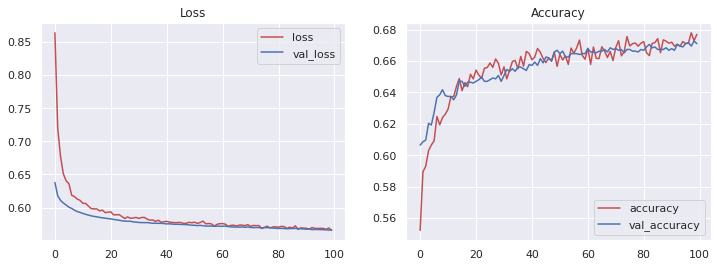

In [149]:
plot_training_process(pd.DataFrame(history.history))

In [150]:
m1.evaluate(X1_train, y1_train)
m1.evaluate(X1_val, y1_val)
m1.evaluate(X1_test, y_test)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapData

2022-01-23 02:25:36.500869: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:36.500932: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:36.500952: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:36.500965: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:36.501442: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:36.501605: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:36.501634: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:37.360733: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:37.361225: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:37.361521: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:37.361886: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:37.362231: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:37.362578: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:37.362922: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0


2022-01-23 02:25:37.652664: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:37.652728: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:37.652748: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:37.652760: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:37.652964: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:37.652996: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:37.653010: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_test_function_44106 in device /job:localhost/replica:0/task:0/device:GPU:0
52/52 [==============================] - 0s 3ms/step - loss: 0.5632 - binary_accuracy: 0.6703
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0


[0.5632385015487671, 0.6703030467033386]

In [151]:
def compute_metrics_nn(model, model_name, X_train, y_train, X_test, y_test):
    y1 = (model.predict(X_train)>0.5)
    y2 = (model.predict(X_test)>0.5)
    
    m = [accuracy_score(y_train, y1),recall_score(y_train, y1),precision_score(y_train, y1),
         accuracy_score(y_test, y2),recall_score(y_test, y2),precision_score(y_test, y2)]
    metrics_df.loc[model_name, :] = [m[0],m[3],m[1],m[4],m[2],m[5]]
    print("Train accuracy/recall/precision:",m[:3])
    print("Test accuracy/recall/precision:", m[3:])

    return y2

In [152]:
y_pred = compute_metrics_nn(m1, "nn_1", X1_train, y1_train, X1_test, y_test)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Option

2022-01-23 02:25:38.052505: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:38.052575: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:38.052596: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:38.052632: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:38.053041: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:38.053252: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:38.053503: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op __inference_predict_function_78380 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_78380 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_78380 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_78380 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_78380 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_78380 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_78380 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_78380 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_78380 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_78380 in device /job:localhost/

2022-01-23 02:25:38.808427: I tensorflow/core/common_runtime/placer.cc:114] args_0: (_Arg): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:38.808965: I tensorflow/core/common_runtime/placer.cc:114] range: (Range): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:38.809357: I tensorflow/core/common_runtime/placer.cc:114] Identity: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:38.809687: I tensorflow/core/common_runtime/placer.cc:114] identity_RetVal: (_Retval): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:38.810002: I tensorflow/core/common_runtime/placer.cc:114] range/start: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:38.810198: I tensorflow/core/common_runtime/placer.cc:114] range/limit: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-01-23 02:25:38.810415: I tensorflow/core/common_runtime/placer.cc:114] range/delta: (Const): /job:localhost/replica:0/task:0/device:CPU:0
2022-

Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhos

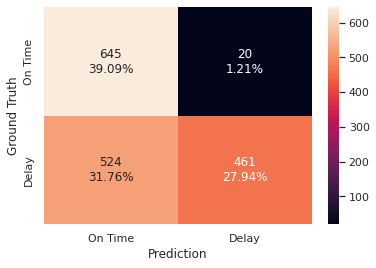

In [153]:
show_confusion_matrix(y_test, y_pred)

# Comparison of Performance

In [154]:
metrics_df.sort_values(by = "Test accuracy",ascending = False) # sort in descending order of test accuracy

Train accuracy Test accuracy Train recall Test recall  \
rf_tuned        0.693229      0.678788     0.512011    0.496447   
stacking        0.690769      0.677576     0.496235    0.476142   
adb             0.681677      0.674545     0.619398    0.613198   
gb              0.718793      0.672727     0.566511    0.524873   
adb_tuned       0.709274      0.672727     0.541413    0.502538   
xgb_tuned       0.759867      0.670909      0.65095    0.566497   
nn_1            0.688996      0.670303     0.492828     0.46802   
rf                   1.0      0.666061          1.0    0.641624   
gb_tuned        0.778372      0.661212     0.689136    0.574619   
xgb             0.899989          0.64     0.877555    0.645685   

          Train precision Test precision  
rf_tuned         0.951366        0.93499  
stacking         0.971569        0.96701  
adb              0.801996       0.794737  
gb               0.937407       0.877759  
adb_tuned        0.949686       0.908257  
xgb_tuned        0.924154       0.827893  
nn_1             0.972149        0.95842  
rf                    1.0       0.761446  
gb_tuned         0.919177         0.8017  
xgb              0.951039       0.721907